In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [9]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

In [10]:
path = Path("expenses_jul25.csv")
df = pd.read_csv(path, sep=",")
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
)
print("cleaned column names:", df.columns.tolist())
if "purchase_date" in df.columns:
    df["purchase_date"] = pd.to_datetime(df["purchase_date"], errors="coerce")

print(df.head())

cleaned column names: ['purchase_date', 'expense', 'amount', 'category']
  purchase_date     expense  amount   category
0    2025-01-06      Coffee    2.80       Food
1    2025-01-06  Bus Ticket    3.50  Transport
2    2025-02-06       Lunch    8.75       Food
3    2025-02-06   Groceries   52.40       Food
4    2025-03-06      Petrol   60.00  Transport


In [11]:

def load_expenses(path):
    df = pd.read_csv(path, parse_dates=["purchase_date"])
    df.columns = df.columns.str.strip().str.lower()
    return df

In [12]:
def summarise_expenses(df):
    """Print quick stats about the dataset."""
    print(df.head())
    print(df.info())
    print(df.describe())

In [13]:
def plot_expenses_by_category(df):
    """Show a bar chart of total expenses by category."""
    totals = df.groupby("category")["amount"].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=totals.values, y=totals.index, palette="viridis")
    plt.title("Total Expenses by Category")
    plt.xlabel("Amount (£)")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()

  purchase_date     expense  amount   category
0    2025-01-06      Coffee    2.80       Food
1    2025-01-06  Bus Ticket    3.50  Transport
2    2025-02-06       Lunch    8.75       Food
3    2025-02-06   Groceries   52.40       Food
4    2025-03-06      Petrol   60.00  Transport
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  100 non-null    datetime64[ns]
 1   expense        100 non-null    object        
 2   amount         100 non-null    float64       
 3   category       100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ KB
None
           amount
count  100.000000
mean    31.877000
std     33.788485
min      2.200000
25%      7.567500
50%     17.650000
75%     54.025000
max    122.000000


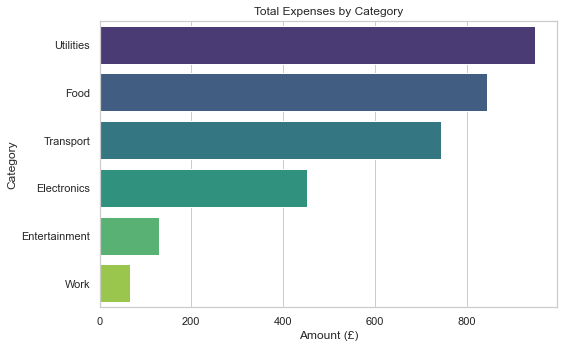

In [14]:
def main():
    df = load_expenses("expenses_jul25.csv")
    summarise_expenses(df)
    plot_expenses_by_category(df)

if __name__ == "__main__":
    main()

In [15]:
path = "expenses_jul25.csv"
df = pd.read_csv(path)
print(df.columns)

Index(['purchase_date', ' expense', ' amount', ' category'], dtype='object')


In [16]:
with open(path) as f:
    for i in range(5):
        print(f.readline())

purchase_date, expense, amount, category

01/06/2025,Coffee,2.8,Food

01/06/2025,Bus Ticket,3.5,Transport

02/06/2025,Lunch,8.75,Food

02/06/2025,Groceries,52.4,Food

